## KMeans Clustering

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and reco

### Read and understand the data

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [222]:
# read the dataset
country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [223]:
dict_df=pd.read_csv("data-dictionary+.csv", sep=",", encoding="ISO-8859-1", header=0)
dict_df

,ï»¿Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [224]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [225]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### No null values and all dtypes are appropriate 
### No cleaning needed.


In [226]:
cig_df=country_df.groupby('country')[['child_mort','income','gdpp']]
cig_df=c_df.reset_index()
cig_df.head()

,index,country,child_mort,income,gdpp
0,0,Afghanistan,90.2,1610,553
1,1,Albania,16.6,9930,4090
2,2,Algeria,27.3,12900,4460
3,3,Angola,119.0,5900,3530
4,4,Antigua and Barbuda,10.3,19100,12200


{'whiskers': [<matplotlib.lines.Line2D at 0x24a5f490eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x24a5f8f6190>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a5f4907c0>],
 'medians': [<matplotlib.lines.Line2D at 0x24a5f8f66d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a5f8f6d60>],
 'means': []}

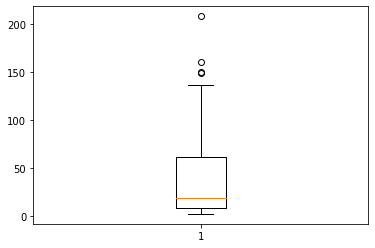

In [227]:
#Univariate and outliers
plt.boxplot(cig_df['child_mort'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24a5f6651f0>,
 'caps': [<matplotlib.lines.Line2D at 0x24a5f665580>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a5f4c81f0>],
 'medians': [<matplotlib.lines.Line2D at 0x24a5f6656d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a5e190e50>],
 'means': []}

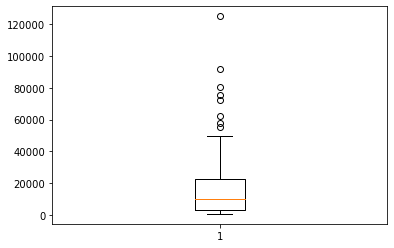

In [228]:
plt.boxplot(cig_df['income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24a5f2f17f0>,
 'caps': [<matplotlib.lines.Line2D at 0x24a5f2f1760>,
 'boxes': [<matplotlib.lines.Line2D at 0x24a5f2f19d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24a5df7e520>],
 'fliers': [<matplotlib.lines.Line2D at 0x24a5c668c70>],
 'means': []}

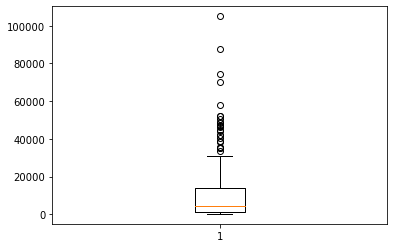

In [229]:
plt.boxplot(cig_df['gdpp'])

### From the above analysis, we have some outliers but it should not a considered as outlier, because a country can be extremely backward and have high Child_mort rate, it may be filtered as a outlier and may not recognised, Similarly a developed high economic country may have very high GDPP and Income, So those values should be verified with the appropriate knowledge before considering them as outliers.

In [230]:
# 2. rescaling
rfm_df = cig_df[['child_mort','income','gdpp']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(167, 3)

In [231]:
# Coverting Array to df
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['child_mort','income','gdpp']
rfm_df_scaled.head()

,child_mort,income,gdpp
0,1.291532,-0.808245,-0.679180
1,-0.538949,-0.375369,-0.485623
2,-0.272833,-0.220844,-0.465376
3,2.007808,-0.585043,-0.516268
4,-0.695634,0.101732,-0.041817


In [232]:
#KMeans Modelling
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [233]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 3,
       3, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 0, 2, 0, 3, 2, 3, 0, 0, 2, 2, 0,
       2, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       3, 3, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 2, 0, 3, 2, 0, 0,
       2, 1, 0, 3, 0, 0, 3, 3, 0, 0, 2, 0, 3, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2])

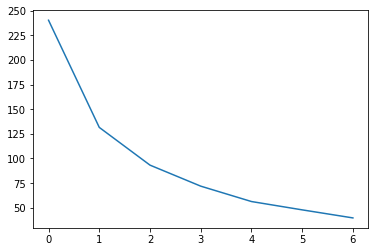

In [234]:
#elbow method
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [235]:
#Silhoutte method
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.5597788232000319
For n_clusters=3, the silhouette score is 0.5306239085564016
For n_clusters=4, the silhouette score is 0.5335726133901342
For n_clusters=5, the silhouette score is 0.46355106831255777
For n_clusters=6, the silhouette score is 0.45539665899175047
For n_clusters=7, the silhouette score is 0.42820883943046617
For n_clusters=8, the silhouette score is 0.444445138046679


### From Silhoute score k=3

In [236]:
#KMeans Modelling for final cluster value
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [237]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [238]:
#Adding cluster_id to cig_df 
cig_df['cluster_id'] = kmeans.labels_
cig_df.head()

,index,country,child_mort,income,gdpp,cluster_id
0,0,Afghanistan,90.2,1610,553,2
1,1,Albania,16.6,9930,4090,1
2,2,Algeria,27.3,12900,4460,1
3,3,Angola,119.0,5900,3530,2
4,4,Antigua and Barbuda,10.3,19100,12200,1


<AxesSubplot:xlabel='cluster_id', ylabel='child_mort'>

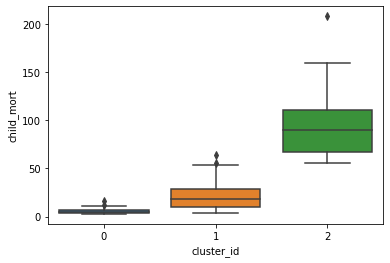

In [239]:
sns.boxplot(x='cluster_id', y='child_mort', data=cig_df)

<AxesSubplot:xlabel='cluster_id', ylabel='income'>

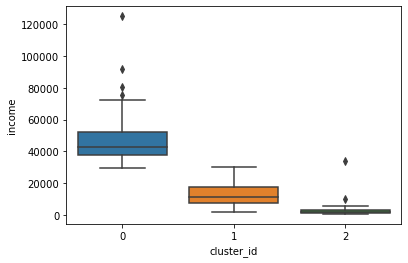

In [240]:
sns.boxplot(x='cluster_id', y='income', data=cig_df)

<AxesSubplot:xlabel='cluster_id', ylabel='gdpp'>

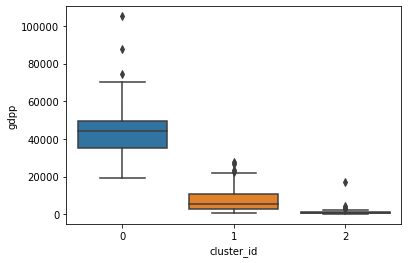

In [241]:
sns.boxplot(x='cluster_id', y='gdpp', data=cig_df)

### From the above analysis, we can say that cluster 2 has a low income,gdpp and high child_mort rate, so we can suggest the CEO of the NGO that cluter 2 needs more help compared to cluster 0 and cluster 1.

### hierarchical clustering


In [242]:
rfm_df_scaled.head()

,child_mort,income,gdpp
0,1.291532,-0.808245,-0.679180
1,-0.538949,-0.375369,-0.485623
2,-0.272833,-0.220844,-0.465376
3,2.007808,-0.585043,-0.516268
4,-0.695634,0.101732,-0.041817


In [243]:
cig_df.head()

,index,country,child_mort,income,gdpp,cluster_id
0,0,Afghanistan,90.2,1610,553,2
1,1,Albania,16.6,9930,4090,1
2,2,Algeria,27.3,12900,4460,1
3,3,Angola,119.0,5900,3530,2
4,4,Antigua and Barbuda,10.3,19100,12200,1


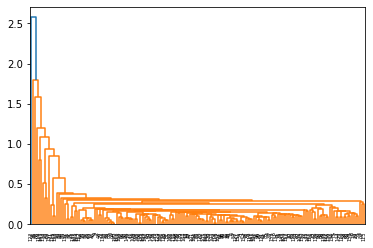

In [244]:
#Single Linkage
metric=linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(metric)
plt.show()

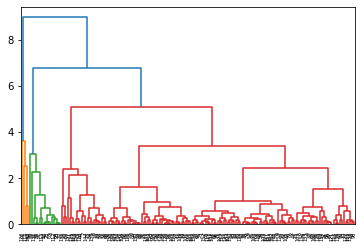

In [245]:
#Complete Linkage
metric1=linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(metric1)
plt.show()

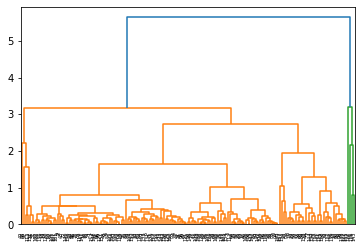

In [246]:
#Average Linkage
metric=linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(metric)
plt.show()

In [247]:
cluster_labels = cut_tree(metric1, n_clusters=3).reshape(-1, )
cluster_labels.shape

(167,)

In [248]:
# Adding cluster labels to the cig_df
cig_df['hierarchial_cluster_labels']=cluster_labels

In [249]:
cig_df.head()

,index,country,child_mort,income,gdpp,cluster_id,hierarchial_cluster_labels
0,0,Afghanistan,90.2,1610,553,2,0
1,1,Albania,16.6,9930,4090,1,0
2,2,Algeria,27.3,12900,4460,1,0
3,3,Angola,119.0,5900,3530,2,1
4,4,Antigua and Barbuda,10.3,19100,12200,1,0


<AxesSubplot:xlabel='hierarchial_cluster_labels', ylabel='gdpp'>

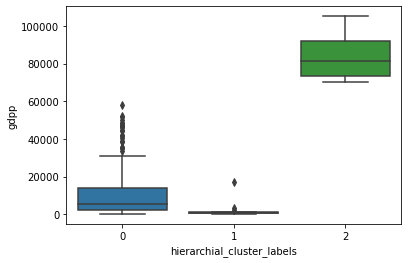

In [250]:
sns.boxplot(x='hierarchial_cluster_labels', y='gdpp', data=cig_df)

<AxesSubplot:xlabel='hierarchial_cluster_labels', ylabel='child_mort'>

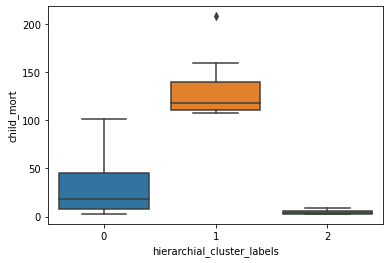

In [251]:
sns.boxplot(x='hierarchial_cluster_labels', y='child_mort', data=cig_df)

<AxesSubplot:xlabel='hierarchial_cluster_labels', ylabel='income'>

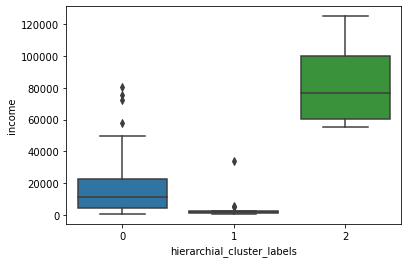

In [252]:
sns.boxplot(x='hierarchial_cluster_labels', y='income', data=cig_df)


### Cluster1 requiers more help compared to cluster 0 and cluster 2

In [253]:
#Finding the list of countries under cluster 2 in clusterid
country_list=cig_df['cluster_id']==2

In [254]:
list_of_countries_need_help=cig_df[country_list]['country']

In [255]:
list_of_countries_need_help.values

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'India', 'Kenya', 'Kiribati', 'Lao',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Myanmar', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda',
       'Senegal', 'Sierra Leone', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Turkmenistan', 'Uganda', 'Yemen', 'Zambia'], dtype=object)

### Here is a list of countries which need help from the NGO.